In [1]:
import os
import sys

# Importante, serve a fare in modo che il jupyter notebook possa vedere ed importare i file di libreria che creiamo in questa cartella.
sys.path.insert(0, '..')

In [2]:
from functions.evaluation import Evaluator, EvaluationResult
from functions.load import saveBestParameterModel
from pandas import read_csv

df_user = read_csv('../data/ridge_features_refined_data.csv')
df_user.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot_Area,2927.0,7.476842e-16,1.000171,-3.775920,-0.346207,0.120200,0.514420,6.272148
Overall_Qual,2927.0,6.090878e+00,1.406195,1.000000,5.000000,6.000000,7.000000,10.000000
Overall_Cond,2927.0,5.563717e+00,1.111960,1.000000,5.000000,5.000000,6.000000,9.000000
Mas_Vnr_Area,2927.0,0.000000e+00,1.000171,-0.790677,-0.790677,-0.790677,1.156440,2.029755
Exter_Qual,2927.0,2.396994e+00,0.578344,1.000000,2.000000,2.000000,3.000000,4.000000
...,...,...,...,...,...,...,...,...
Garage_Type_No_Garage,2927.0,5.363854e-02,0.225342,0.000000,0.000000,0.000000,0.000000,1.000000
Sale_Type_'WD ',2927.0,8.664161e-01,0.340263,0.000000,1.000000,1.000000,1.000000,1.000000
Year_Sold,2927.0,2.007791e+03,1.317120,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000
Mo_Sold,2927.0,6.215237e+00,2.712368,1.000000,4.000000,6.000000,8.000000,12.000000


In [3]:
# Import the CatBoostRegressor
from catboost import CatBoostRegressor

Cbst = Evaluator(CatBoostRegressor(loss_function='RMSE', eval_metric='RMSE', logging_level='Silent'), df_user, 'Sale_Price')
Cbst.split_dataset()

In [4]:
params, scores = Cbst.grid_search_cv({
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.2, 0.1, 0.01, 0.001], 
    'depth': [2, 4, 6, 8]
})

saveBestParameterModel(type(Cbst.model).__name__, params)
params, scores

({'depth': 4,
  'iterations': 1000,
  'learning_rate': 0.1,
  'model_name': 'CatBoostRegressor'},
 0.9298512435086526)

In [5]:
Cbst = Evaluator(CatBoostRegressor(iterations=params['iterations'], learning_rate=params['learning_rate'], depth=params['depth'],
                loss_function='RMSE', eval_metric='RMSE', logging_level='Silent'), df_user, 'Sale_Price')

Cbst.split_dataset()

In [6]:
Cbst.temporal_cv(verbose=True).inline()

[Split 0/10] - train_size: 0.093
r2: 0.90474  -  explained_variance: 0.90481  -  rmse: 0.28127  -  mae: 0.15462  -  max_error: 1.57989

[Split 1/10] - train_size: 0.183
r2: 0.91662  -  explained_variance: 0.91733  -  rmse: 0.29434  -  mae: 0.16208  -  max_error: 1.29065

[Split 2/10] - train_size: 0.274
r2: 0.90857  -  explained_variance: 0.90967  -  rmse: 0.32618  -  mae: 0.16045  -  max_error: 1.58789

[Split 3/10] - train_size: 0.365
r2: 0.94236  -  explained_variance: 0.94247  -  rmse: 0.22204  -  mae: 0.14218  -  max_error: 0.88919

[Split 4/10] - train_size: 0.456
r2: 0.93182  -  explained_variance: 0.93576  -  rmse: 0.23253  -  mae: 0.12850  -  max_error: 1.07372

[Split 5/10] - train_size: 0.546
r2: 0.90028  -  explained_variance: 0.90046  -  rmse: 0.31835  -  mae: 0.12567  -  max_error: 1.24433

[Split 6/10] - train_size: 0.637
r2: 0.85992  -  explained_variance: 0.85992  -  rmse: 0.41859  -  mae: 0.16353  -  max_error: 3.97063

[Split 7/10] - train_size: 0.728
r2: 0.94128  - 

'r2: 0.91727  -  explained_variance: 0.91833  -  rmse: 0.28185  -  mae: 0.14051  -  max_error: 1.50130'

In [7]:
Cbst.evaluate()

r2:                  0.89782
explained_variance:  0.89821
rmse:                0.32305
mae:                 0.13386
max_error:           3.65610

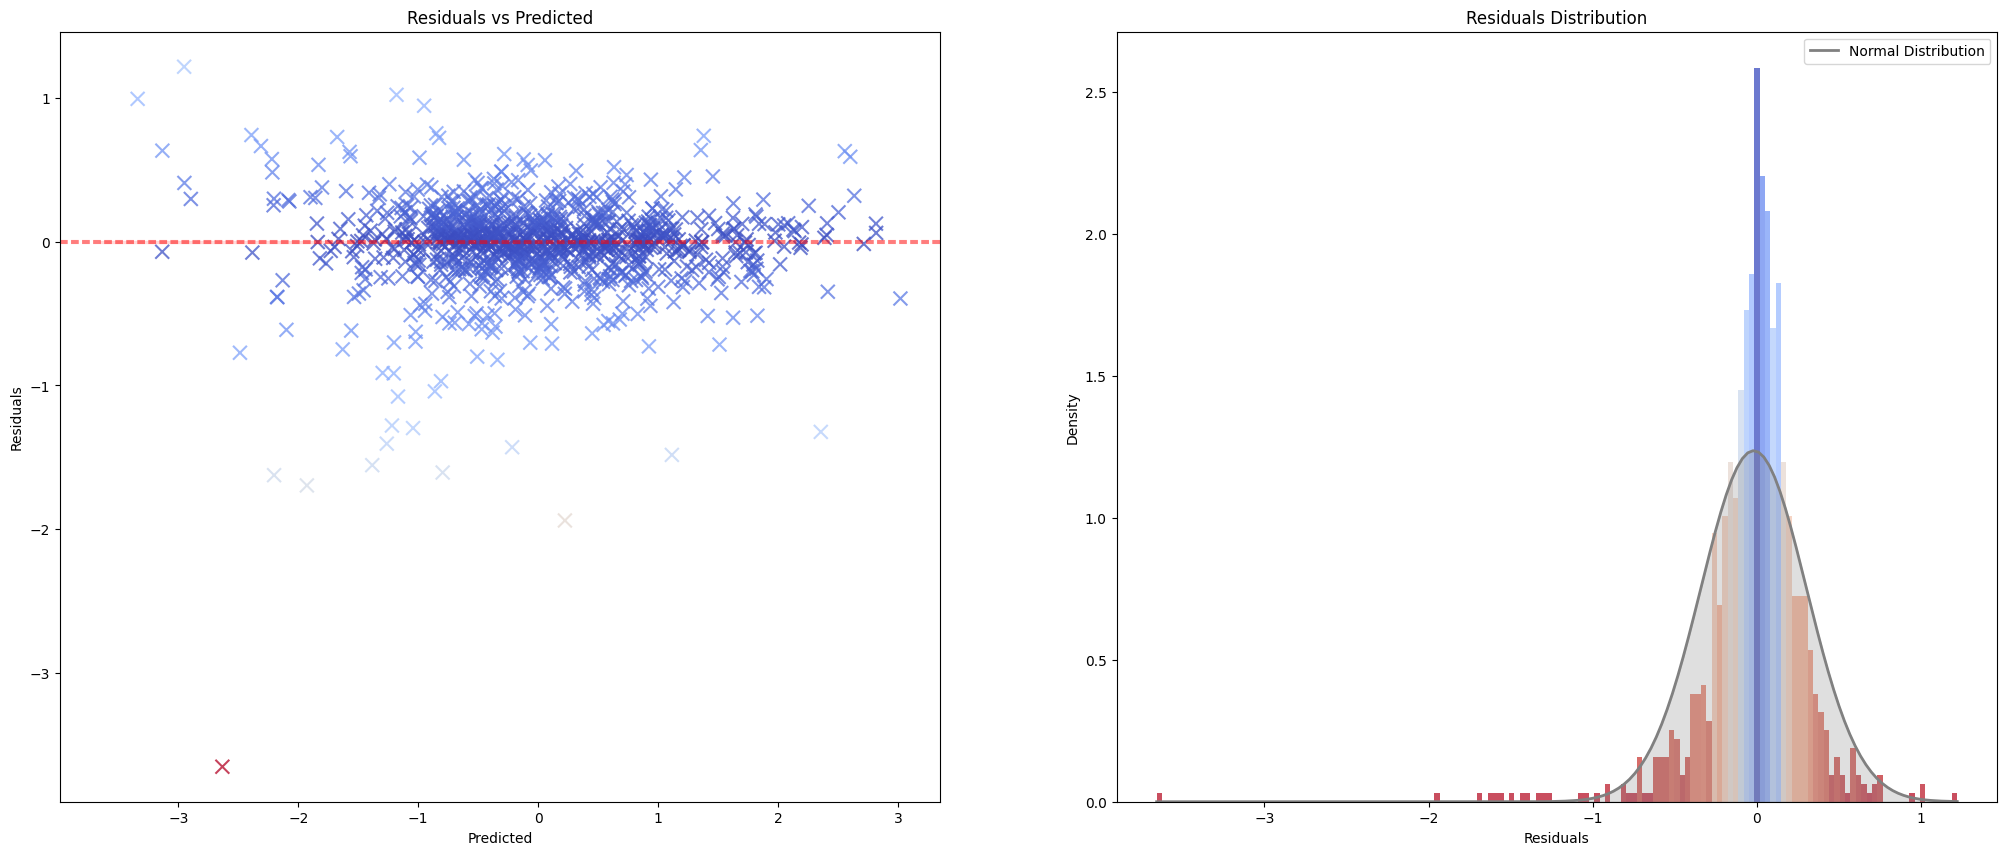

In [8]:
Cbst.plot_residuals()